# Introducing the Dataset

In [1]:
import pandas as pd

board_games = pd.read_csv("https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv")
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


One interesting machine learning task might be to predict average_rating using the other columns

# Data Cleaning

In [2]:
#Use the dropna Dataframe method with the axis argument set to 0 to remove any rows that contain missing values
board_games = board_games.dropna(axis=0)

#Remove any rows in board_games where users_rated equals 0. This will remove any rows that have no reviews
board_games = board_games[board_games["users_rated"] != 0]

print(board_games.shape)
board_games.head()

(56894, 20)


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


We can see that we removed 23106 rows from the data where there were either NA values or no users had rated the game (this is essential considering we are trying to predict user ratings.) 

# Picking an Error Metric

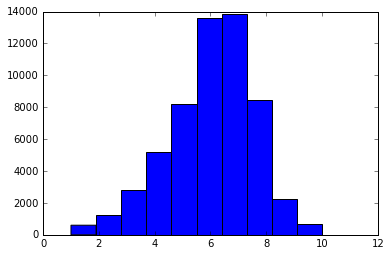

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram of the average_rating column 
plt.hist(board_games["average_rating"])
plt.show()

In [4]:
#Calculate the mean and standard deviation of the average_rating column
rating_mean = board_games["average_rating"].mean()
rating_std = board_games["average_rating"].std()

print("Mean average rating:",rating_mean)
print("Stdev average rating:",rating_std)

Mean average rating: 6.016112849333889
Stdev average rating: 1.5788299348332662


Our data is unimodal and somewhat symmetrical, meaning the data follow a somewhat normal distribution. It is for this reason that we will be using mean squared error as our cost function or error metric.

One way to look for patterns is to use a clustering algorithm to create clusters, then plot them out

In [5]:
from sklearn.cluster import KMeans

#Initializing KMeans class with 5 clusters
clust = KMeans(n_clusters=5)

#Removing all columns that do not contain numeric data
columns = list(board_games.columns)
columns.remove("name")
columns.remove("type")
columns.remove("id")

numeric_columns = board_games[columns]
numeric_columns.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [6]:
#Now using numeric_columns to fit our clustering algorithm
clust.fit(numeric_columns)

#Extracting labels
labels = clust.labels_

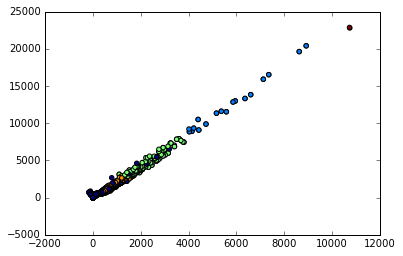

In [7]:
#Plot out the cluster assignments
import numpy as np

game_mean = numeric_columns.apply(np.mean, axis=1)
game_std = numeric_columns.apply(np.std, axis=1)

plt.scatter(x=game_mean, y=game_std, c=labels)
plt.show()

It looks like most of the games are fairly similar, but as the game features increase in value (such as number of users who rated), there fewer high quality games. So most games don't get played too often, but a few get many players.

# Correlations

Now we will figure out which columns correlate well with average_rating. This will enable us to remove columns that don't add much predictive power to the model. Columns that are uncorrelated with the target won't help a linear regression model, which is what we will be training.

In [8]:
correlations = numeric_columns.corr()
print(correlations["average_rating"])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


The yearpublished column is surprisingly highly correlated with average_rating, meaning that more recent games tend to be rated more highly. Games for older players (minage is high) tend to be more highly rated as well. Lastly, we see that the more "weight" a game has (average_weight is high), the more highly it tends to be rated.

# Creating a Linear Regression Model

In [9]:
'''We will go ahead and remove all columns that are weakly (<0.05) correlated with average_rating. We will also go ahead and 
remove the bayes_average_rating since this is calculated using the average_rating column'''

rem_cols = ["average_rating", "bayes_average_rating", "minplayers", "maxplayers", "playingtime", "minplaytime", "maxplaytime"]
for col in rem_cols:
    columns.remove(col)

In [10]:
#These will be the remaining features from the dataset that we will train our LR model on
print(columns)

['yearpublished', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


Ordinarily, we would to split the data into training and testing sets, train the algorithm on the training set, and test its performance on the test set. However, this project is meant to showcase python machine learning techniques, and so cross-validation and accuracy are not pivotal here.

In [11]:
#Now we will actually train our model and use it to predict average_rating for board_games
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(board_games[columns], board_games["average_rating"])
predictions = lr.predict(board_games[columns])

mse = np.mean((predictions - board_games["average_rating"]) ** 2)
print(mse)

2.0970561336049447


When we initially trained our LR model on all numeric columns, we got a MSE of 2.093. But, after we removed all columns with weak correlations to average rating (<0.05,) the MSE increased to 2.097. This means that even those 5 weakly correlated features contribute to the performance of our algorithm. 

The error rate is close to the standard deviation of all board game ratings (1.578.) This indicates that our model may not have high predictive power. 

We'll need to dig more into which games were scored well, and which ones weren't.

# Further Analysis

Split the data into training and testing sets, and calculate error on the testing set.

Try algorithms other than linear regression.

Calculate new predictors based off the the existing columns, such as:
Player range (maxplayers - minplayers),
Playing time range (maxplaytime - minplaytime),
Average number of ratings (total_owners / users_rated)

Scrape the latest data from BoardGameGeek to increase the size of the dataset.

Scrape additional data from BoardGameGeek to add in more columns.